In [1]:
import pandas as pd
import numpy as np

train = pd.read_csv('/Jang/2020/train.csv')
test = pd.read_csv('/Jang/2020/test.csv')


In [63]:
train.head()

,Survived,Pclass,Fare,Family,Sex_female,Sex_male,Age_Child,Age_Middle,Age_Old,Age_Prime,Age_Young,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other
0,0,3,0,1,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0
1,1,1,4,1,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0
2,1,3,1,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0
3,1,1,4,1,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0
4,0,3,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0


In [2]:
print('train data shape: ', train.shape)
print('test data shape: ', test.shape)
print('----------[train infomation]----------')
print(train.info())
print('----------[test infomation]----------')
print(test.info())

train data shape:  (891, 12)
test data shape:  (418, 11)
----------[train infomation]----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
----------[test infomation]----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float

In [3]:
#데이터 값 분포 확인
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set() # setting seaborn default for plots

In [5]:
def pie_chart(feature):
    # 특징 컬럼을 파라미터로 전달받아 각각의 비율로 파이그래프 생성
    # 카테고리별 생존과 사망 비율을 확인
    
    feature_ratio = train[feature].value_counts(sort=False)
    feature_size = feature_ratio.size
    feature_index = feature_ratio.index
    survived = train[train['Survived'] == 1][feature].value_counts()
    dead = train[train['Survived'] == 0][feature].value_counts()
    
    
    plt.plot(aspect='auto')
    plt.pie(feature_ratio, labels=feature_index, autopct='%1.1f%%')
    plt.title(feature + '\'s ratio in total')
    plt.show()
    
    # 특징의 각 카테고리 내의 사망 비율
    for i, index in enumerate(feature_index):
        plt.subplot(1, feature_size + 1, i + 1, aspect='equal')
        plt.pie([survived[index], dead[index]], labels=['Survivied', 'Dead'], autopct='%1.1f%%')
        plt.title(str(index) + '\'s ratio')

    plt.show()

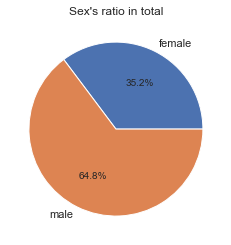

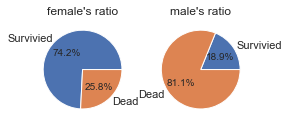

In [6]:
pie_chart('Sex')
#남성이 여성보다 배에 많이 탔으며, 남성보다 여성의 생존 비율이 높다는 것을 알수 있다.

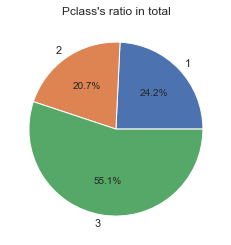

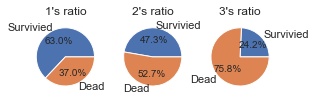

In [7]:
pie_chart('Pclass')

Pclass가 3인 사람들의 수가 가장 많았으며, Pclass가 높을수록(숫자가 작을수록; 사회경제적 지위가 높을수록) 생존 비율이 높다는 것을 알 수 있다.

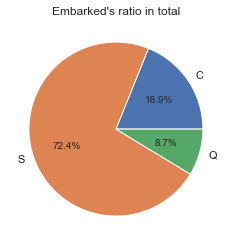

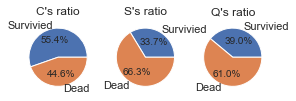

In [8]:
pie_chart('Embarked')


Southampton에서 선착한 사람이 가장 많았으며, Cherbourg에서 탄 사람 중에서는 생존한 사람의 비율이 높았고,
나머지 두 선착장에서 탄 사람들은 생존한 사람보다 그렇지 못한 사람이 조금 더 많았다.

In [9]:
def bar_chart(feature):
    #특징을 파라미터로 하여 막대그래프 생성.
    #각 수치별 생존 비율을 확인
    survived = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True, figsize=(10,5))

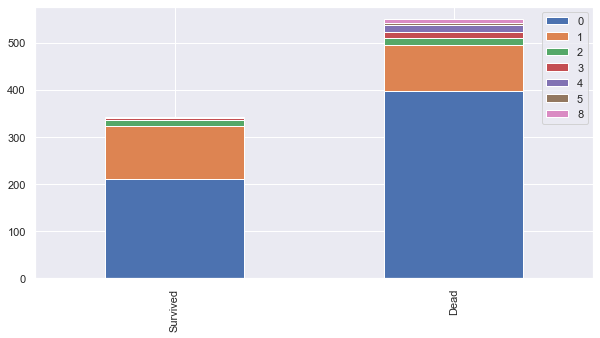

In [10]:
bar_chart("SibSp")

2명 이상의 형제나 배우자와 함께 배에 탔을 경우 생존한 사람의 비율이 컸다는 것을 볼 수 있고, 그렇지 않을 경우에는 생존한 사람의 비율이 적었다는 것을 볼 수 있다.

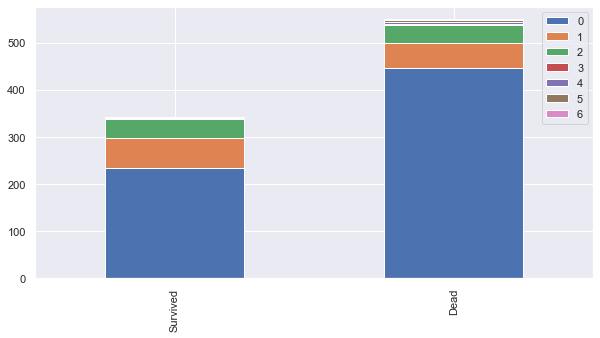

In [12]:
bar_chart("Parch")

Parch특성은 SibSp와 비슷하게 2명 이상의 부모나 자식과 함께 배에 탔을 때는 조금 더 생존했지만, 그렇지 않을 경우에는 생존한 사람의 비율이 적었다.

데이터 특성들을 간략하게 종합해보면,
성별이 여성일 수록
Pclass가 높을 수록
Cherbourg 선착장에서 배를 탔다면
형제, 자매, 배우자, 부모, 자녀와 함께 배에 탔다면
생존 확률이 더 높았다



선택할 특성은 Name, Sex, Embarked, Age, SibSp, Parch, Fare, Pclass이며, Ticket과 Cabin에 대한 의미는 아직 찾지 못했으므로 데이터 세트에서 제외

또한 데이터 전처리를 하는 과정에서는 train과 test 데이터를 같은 방법으로 한 번에 처리를 해야하므로 먼저 두 개의 데이터를 합쳐보도록하자.

In [13]:
train_and_test = [train, test]

In [14]:
for dataset in train_and_test:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.')

train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


 정규표현식을 이용하여, 공백으로 시작하고, .으로 끝나는 문자열을 추출할 때 저렇게 표현을 한다.

In [15]:
pd.crosstab(train['Title'], train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [16]:
for dataset in train_and_test:
    dataset['Title'] = dataset['Title'].replace(['Capt', 'Col', 'Countess', 'Don','Dona', 'Dr', 'Jonkheer',
                                                 'Lady','Major', 'Rev', 'Sir'], 'Other')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')

train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Other,0.347826


String Data로 변형

In [17]:
for dataset in train_and_test:
    dataset['Title'] = dataset['Title'].astype(str)

In [18]:
for dataset in train_and_test:
    dataset['Sex'] = dataset['Sex'].astype(str)

In [34]:
train.Embarked.value_counts(dropna=False)
# NaN 값을 포함한 카테고리별 개수 확인

S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64

value_counts()에서 dropna를 False로 해주면 NaN 값을 포함한 갯수의 총합을 세준다.

Embarked Feature의 분포를 살펴보면 S가 대부분인데, 빠져있는 두 개의 데이터도 거기에 속할 확률이 크므로 S로 넣어주고 String Data로 변형

In [35]:
for dataset in train_and_test:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')
    dataset['Embarked'] = dataset['Embarked'].astype(str)


Age Feature에도 NaN값에,나머지 모든 승객 나이의 평균을 넣음

pd.cut()을 이용해 바인딩


In [36]:
for dataset in train_and_test:
    dataset['Age'].fillna(dataset['Age'].mean(), inplace=True)
    dataset['Age'] = dataset['Age'].astype(int)
    train['AgeBand'] = pd.cut(train['Age'], 5)
print (train[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean()) # Survivied ratio about Age Band

         AgeBand  Survived
0  (-0.08, 16.0]  0.550000
1   (16.0, 32.0]  0.344762
2   (32.0, 48.0]  0.403226
3   (48.0, 64.0]  0.434783
4   (64.0, 80.0]  0.090909


구간 이름 변경

In [37]:
for dataset in train_and_test:
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age'] = 4
    dataset['Age'] = dataset['Age'].map( { 0: 'Child',  1: 'Young', 2: 'Middle', 3: 'Prime', 4: 'Old'} ).astype(str)

Fare 값 PClass 3 평균값 넣기

In [38]:
print (train[['Pclass', 'Fare']].groupby(['Pclass'], as_index=False).mean())
print("")
print(test[test["Fare"].isnull()]["Pclass"])

   Pclass       Fare
0       1  84.154687
1       2  20.662183
2       3  13.675550

152    3
Name: Pclass, dtype: int64


 평균 Fare 13.675550

In [39]:
for dataset in train_and_test:
    dataset['Fare'] = dataset['Fare'].fillna(13.675) # The only one empty fare data's pclass is 3.

In [40]:
for dataset in train_and_test:
    dataset.loc[ dataset['Fare'] <= 7.854, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.854) & (dataset['Fare'] <= 10.5), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 10.5) & (dataset['Fare'] <= 21.679), 'Fare']   = 2
    dataset.loc[(dataset['Fare'] > 21.679) & (dataset['Fare'] <= 39.688), 'Fare']   = 3
    dataset.loc[ dataset['Fare'] > 39.688, 'Fare'] = 4
    dataset['Fare'] = dataset['Fare'].astype(int)

두 개의 Feature를 합쳐서 Family라는 Feature로 변경

In [41]:
for dataset in train_and_test:
    dataset["Family"] = dataset["Parch"] + dataset["SibSp"]
    dataset['Family'] = dataset['Family'].astype(int)

학시킬때 제외시킬 Feature들을 Drop.

In [53]:
features_drop = ['Name', 'Ticket', 'Cabin', 'SibSp', 'Parch']
train = train.drop(features_drop, axis=1)
test = test.drop(features_drop, axis=1)
train = train.drop(['PassengerId', 'AgeBand', 'FareBand'], axis=1)


   Survived  Pclass     Sex     Age  Fare Embarked Title  Family
0         0       3    male   Young     0        S    Mr       1
1         1       1  female  Middle     4        C   Mrs       1
2         1       3  female   Young     1        S  Miss       0
3         1       1  female  Middle     4        S   Mrs       1
4         0       3    male  Middle     1        S    Mr       0
   PassengerId  Pclass     Sex     Age  Fare Embarked Title  Family
0          892       3    male  Middle     0        Q    Mr       0
1          893       3  female  Middle     0        S   Mrs       1
2          894       2    male   Prime     1        Q    Mr       0
3          895       3    male   Young     1        S    Mr       0
4          896       3  female   Young     2        S   Mrs       2


In [54]:

print(train.head())
print(test.head())


   Survived  Pclass     Sex     Age  Fare Embarked Title  Family
0         0       3    male   Young     0        S    Mr       1
1         1       1  female  Middle     4        C   Mrs       1
2         1       3  female   Young     1        S  Miss       0
3         1       1  female  Middle     4        S   Mrs       1
4         0       3    male  Middle     1        S    Mr       0
   PassengerId  Pclass     Sex     Age  Fare Embarked Title  Family
0          892       3    male  Middle     0        Q    Mr       0
1          893       3  female  Middle     0        S   Mrs       1
2          894       2    male   Prime     1        Q    Mr       0
3          895       3    male   Young     1        S    Mr       0
4          896       3  female   Young     2        S   Mrs       2


마지막으로 Categorical Feature에 대해 one-hot encoding과 train data와 label을 분리시키는 작업을 하면 예측 모델에 학습시킬 준비가 끝났다.

In [55]:
train = pd.get_dummies(train)
test = pd.get_dummies(test)

train_label = train['Survived']
train_data = train.drop('Survived', axis=1)
test_data = test.drop("PassengerId", axis=1).copy()


1. Logistic Regression
2. Support Vector Machine (SVM)
3. k-Nearest Neighbor (kNN)
4. Random Forest
5. Naive Bayes



In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.utils import shuffle

정렬된 학습데이터 섞기|

In [57]:
train_data, train_label = shuffle(train_data, train_label, random_state = 5)

In [59]:
train_data.head()

,Pclass,Fare,Family,Sex_female,Sex_male,Age_Child,Age_Middle,Age_Old,Age_Prime,Age_Young,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other
126,3,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0
354,3,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0
590,3,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0
509,3,4,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0
769,3,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0


pipeline 생성
scikit-learn 함수쓰면댐

In [60]:
def train_and_test(model):
    model.fit(train_data, train_label)
    prediction = model.predict(test_data)
    accuracy = round(model.score(train_data, train_label) * 100, 2)
    print("Accuracy : ", accuracy, "%")
    return prediction

In [61]:
# Logistic Regression
log_pred = train_and_test(LogisticRegression())
# SVM
svm_pred = train_and_test(SVC())
#kNN
knn_pred_4 = train_and_test(KNeighborsClassifier(n_neighbors = 4))
# Random Forest
rf_pred = train_and_test(RandomForestClassifier(n_estimators=100))
# Navie Bayes
nb_pred = train_and_test(GaussianNB())

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy :  82.72 %
Accuracy :  83.5 %
Accuracy :  85.41 %
Accuracy :  88.55 %
Accuracy :  79.8 %


Random Forest(88.55%)submission.

In [62]:
submission = pd.DataFrame({
    "PassengerId": test["PassengerId"],
    "Survived": rf_pred
})

submission.to_csv('submission_rf.csv', index=False)